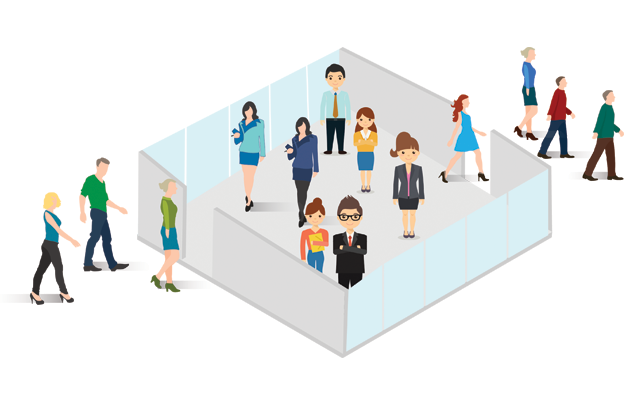

# 1.PROBLEM STATEMENT

Bank is facing a churn out on its customer and have data.Bank's management wants to derive insights from data with visualisations
. 

# 2.Importing Libraries and Dataset

In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv(r'C:\Users\esvit\Downloads\Downloads\data science\intellipat\data\Credit Card Customer Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# 3.EDA

BEFORE PERFORMING EDA LETS CHECK DATA QUALITY

In [5]:
#CHECKING DUPLICATE DATA`
df.duplicated().sum()

0

In [6]:
#checking format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#checking null values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1795,1796,15757648,Marshall,683,Germany,Female,35,5,95698.79,1,0,1,182566.76,0
3976,3977,15792180,Chiekwugo,566,Germany,Male,22,7,144954.75,2,1,0,102246.00,0
1176,1177,15604217,Williams,726,France,Male,34,9,0.00,2,0,0,14121.61,0
4097,4098,15663386,Tuan,597,Spain,Female,26,7,0.00,2,1,0,110253.20,0
2748,2749,15753332,Loftus,401,Germany,Male,48,8,128140.17,1,1,0,175753.55,1


# 3.1 Numerical Analysis


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [11]:
#checking number of churn out cusomer
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df_=df.groupby(['Geography','Exited'])['Exited'].count()
df_

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

In [14]:
df.groupby(['Gender','Exited'])['Exited'].count()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

# 3.2 Visualisation

Since visualization can be done in multiple ways I will restrict it to only with respect to Target variable ,'Existed' columns because our Objective is to Drive insights for Churning

In [15]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


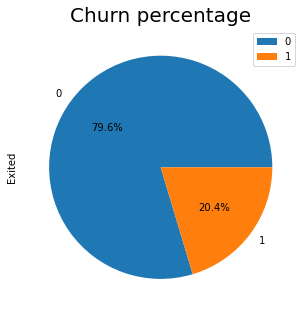

In [16]:
plt.figure(figsize=(5,10))
df.Exited.value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Churn percentage',fontsize=20)
plt.legend()
plt.show()

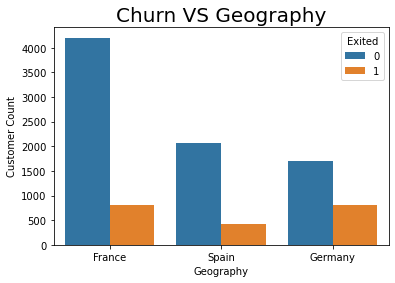

In [18]:
sns.countplot(data=df,x='Geography',hue='Exited')
plt.title('Churn VS Geography',color='Black',fontsize=20)
plt.xlabel('Geography',color='Black',fontsize=10)
plt.ylabel('Customer Count',color='Black',fontsize=10)
plt.show()

In [20]:
import warnings
warnings.filterwarnings('ignore')

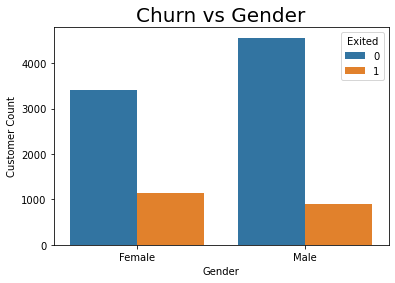

In [21]:
sns.countplot(df['Gender'],hue=df['Exited'])
plt.title('Churn vs Gender',fontsize=20)
plt.xlabel('Gender',fontsize=10)
plt.ylabel('Customer Count',fontsize=10)
plt.show()

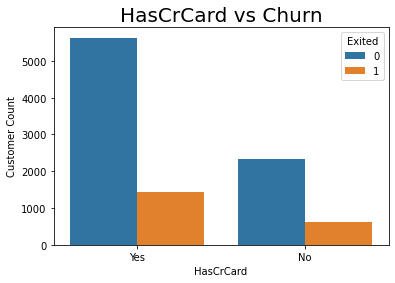

In [23]:
ac=np.where(df['HasCrCard'] == 1,'Yes','No')#Converting HasCrCard to yes and no -temporarily and 
#then ploting to get churn
ac
sns.countplot(ac,hue=df['Exited'])
plt.title('HasCrCard vs Churn',fontsize=20)
plt.xlabel('HasCrCard',fontsize=10)
plt.ylabel('Customer Count',fontsize=10)
plt.show()

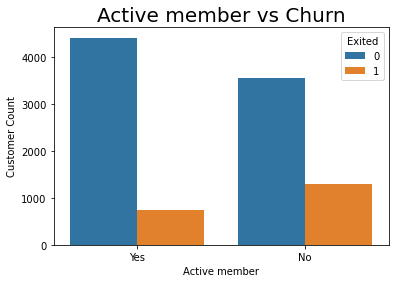

In [24]:
ac=np.where(df['IsActiveMember'] == 1,'Yes','No')#Converting active member to yes and no -temporarily and 
#then ploting to get churn
ac
sns.countplot(ac,hue=df['Exited'])
plt.title('Active member vs Churn',fontsize=20)
plt.xlabel('Active member',fontsize=10)
plt.ylabel('Customer Count',fontsize=10)
plt.show()

In [25]:
import

SyntaxError: invalid syntax (2125240012.py, line 1)

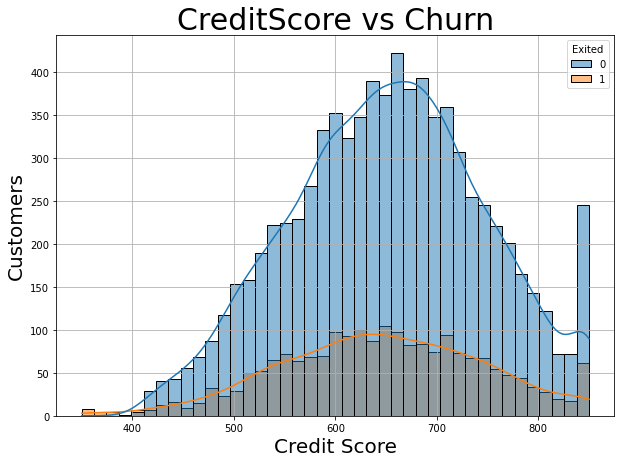

In [26]:
plt.figure(figsize=(10,7))
sns.histplot(x=df['CreditScore'],hue=df['Exited'],kde=True)
plt.grid()
plt.title('CreditScore vs Churn',fontsize=30)
plt.xlabel('Credit Score',fontsize=20)
plt.ylabel('Customers',fontsize=20)
plt.show()

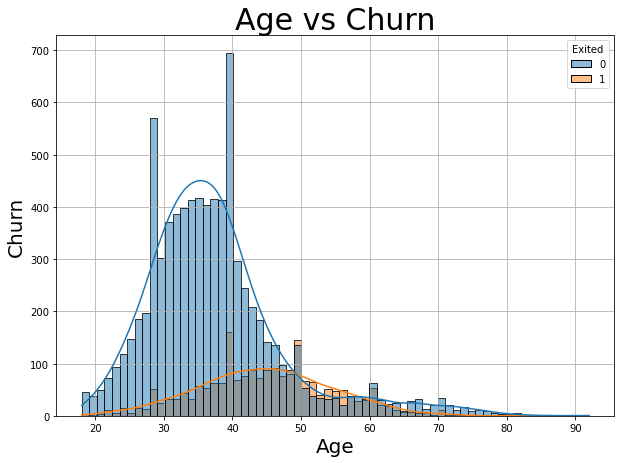

In [27]:
plt.figure(figsize=(10,7))
sns.histplot(x=df['Age'],hue=df['Exited'],kde=True)
plt.grid()
plt.title('Age vs Churn',fontsize=30)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Churn',fontsize=20)
plt.show()

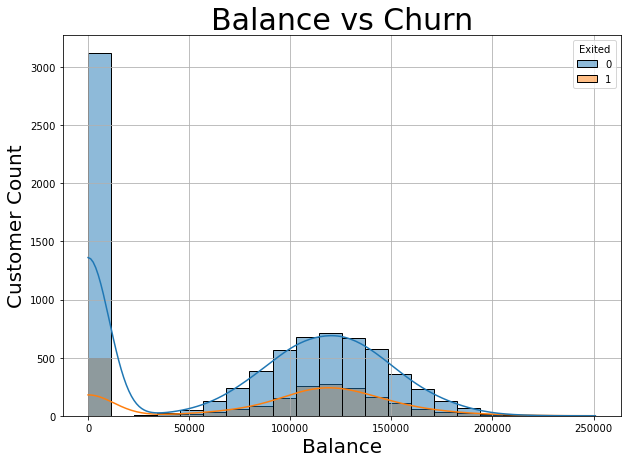

In [28]:
plt.figure(figsize=(10,7))
sns.histplot(x=df['Balance'],hue=df['Exited'],kde=True)
plt.grid()
plt.title('Balance vs Churn',fontsize=30)
plt.xlabel('Balance',fontsize=20)
plt.ylabel('Customer Count',fontsize=20)
plt.show()

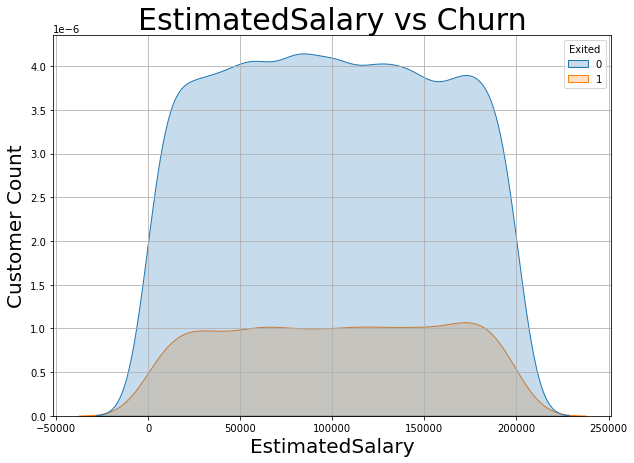

In [30]:
plt.figure(figsize=(10,7))
sns.kdeplot(x=df['EstimatedSalary'],hue=df['Exited'],fill=True)
plt.grid()
plt.title('EstimatedSalary vs Churn',fontsize=30)
plt.xlabel('EstimatedSalary',fontsize=20)
plt.ylabel('Customer Count',fontsize=20)
plt.show()

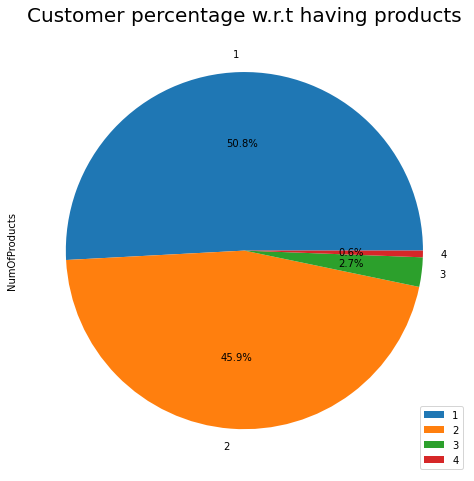

In [31]:

plt.figure(figsize=(8,14))
df['NumOfProducts'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Customer percentage w.r.t having products',fontsize=20)
plt.legend()
plt.show()


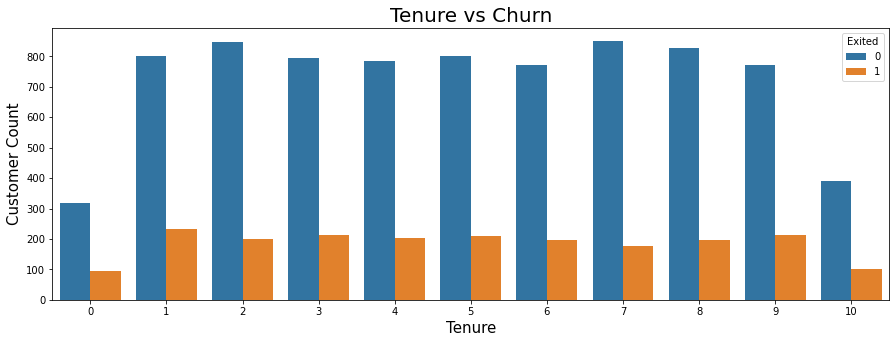

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(df['Tenure'],hue=df['Exited'])
plt.title('Tenure vs Churn',fontsize=20)
plt.xlabel('Tenure',fontsize=15)
plt.ylabel('Customer Count',fontsize=15)
plt.show()

## OBESERVATION

20% of the customers churned out


Germany and France have most churn out and France have a large retention of customers

Male and Female have almost similar churning however male segment has more retention`.

Customer having credit card churn greater than no credt card but have very High Retention


Non-Active member churns higher than active memeber

Credit card score between 600-700 ahs churn more also same for retention




AAge 40-55 has more churning


0 balance shows no churning and 1 lakh to 1.5 lakh show More churning

50% customer has only 1 product and 45% having 2 product.only 5% has 3 to 4 Products







Retention and churning is same for Tenure

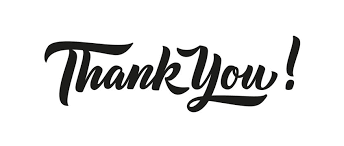